In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn

In [2]:
!wget http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat

--2022-11-19 15:10:18--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat [following]
--2022-11-19 15:10:18--  https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat’

Indian_pines_correc 100%[===================>]   5.68M  3.02MB/s    in 1.9s    

2022-11-19 15:10:20 (3.02 MB/s) - ‘Indian_pines_corrected.mat’ saved [5953527/5953527]

--2022-11-19 15:10:20--  http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP requ

In [3]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
  y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (145, 145, 200)
y shape: (145, 145)


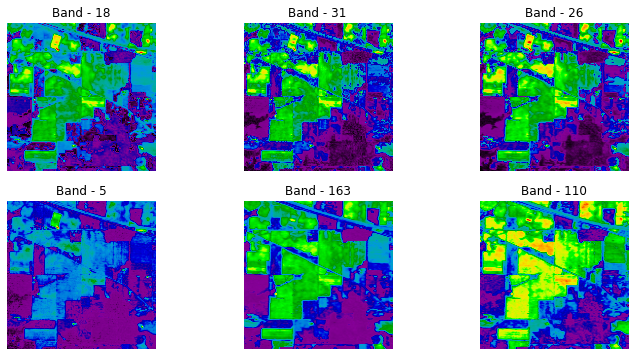

In [4]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('IP_Bands.png')

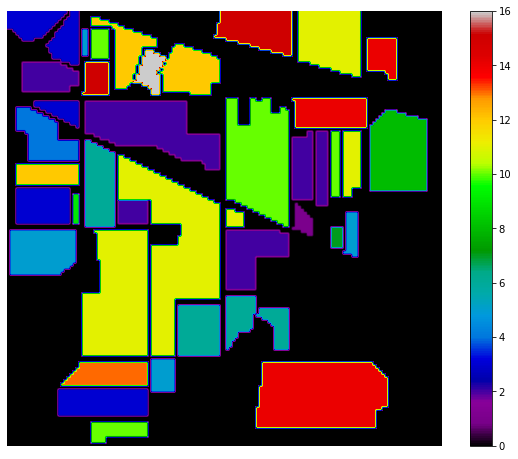

In [5]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

In [6]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)

In [7]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [9]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,...,1079.310773,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,...,49.943791,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,...,998.000000,998.000000,999.000000,999.000000,993.000000,990.000000,992.000000,989.000000,986.000000,981.000000
25%,2602.000000,3889.000000,4066.000000,3954.000000,4214.000000,4425.000000,4421.000000,4263.000000,4173.000000,3940.000000,...,1031.000000,1026.000000,1024.000000,1024.000000,1019.000000,1016.000000,1016.000000,1012.000000,1006.000000,1004.000000
50%,2780.000000,4106.000000,4237.000000,4126.000000,4478.000000,4754.000000,4808.000000,4666.000000,4632.000000,4404.000000,...,1068.000000,1053.000000,1052.000000,1054.000000,1043.000000,1033.000000,1035.000000,1026.000000,1014.000000,1009.000000
75%,3179.000000,4247.000000,4479.000000,4350.000000,4772.000000,5093.000000,5198.000000,5100.000000,5084.000000,4860.000000,...,1129.000000,1099.000000,1098.000000,1104.000000,1083.000000,1066.000000,1072.000000,1050.000000,1024.000000,1014.000000
max,4536.000000,5744.000000,6361.000000,6362.000000,7153.000000,7980.000000,8284.000000,8128.000000,8194.000000,7928.000000,...,1364.000000,1287.000000,1289.000000,1315.000000,1258.000000,1201.000000,1245.000000,1167.000000,1076.000000,1036.000000


In [10]:
object= StandardScaler()

In [11]:
scale = object.fit_transform(df)
print(scale)

[[ 0.6047628   0.21997468  0.8862633  ...  0.38894136  1.62910551
  -0.23191185]
 [-1.06326446  0.75820528  0.87074869 ...  1.17937664  1.62910551
  -0.23191185]
 [ 2.05583381  0.75820528  0.55657785 ...  1.26720278  1.06179023
  -0.23191185]
 ...
 [ 0.55122814 -0.98670358  0.01744517 ... -0.66497235 -1.20747086
  -0.79989506]
 [ 0.55686337  0.05503305 -0.66519764 ... -0.92845077 -0.7819844
  -0.79989506]
 [ 1.03022246 -1.00406586 -0.31224028 ... -1.01627691 -1.20747086
  -0.79989506]]


[6.82998623e-01 1.90993774e-01 2.55300651e-02 1.67816676e-02
 1.04393866e-02 8.86403521e-03 4.71804959e-03 4.28522477e-03
 3.90607758e-03 3.68145452e-03 3.44203674e-03 2.83123947e-03
 2.43986300e-03 2.12257316e-03 1.92313758e-03 1.84537507e-03
 1.79236852e-03 1.73325357e-03 1.57012332e-03 1.53247921e-03
 1.49267266e-03 1.30933860e-03 1.20498651e-03 1.10173433e-03
 9.95289437e-04 9.51674816e-04 8.71066536e-04 8.32985636e-04
 7.90198278e-04 7.55047399e-04 7.15822695e-04 6.93636168e-04
 6.68649606e-04 6.22502492e-04 6.10207564e-04 5.87154820e-04
 5.78274023e-04 5.15799230e-04 4.90463684e-04 4.56320478e-04
 4.42556581e-04 4.14159532e-04 3.84008070e-04 3.65811440e-04
 3.41240540e-04 3.28586874e-04 3.07037040e-04 3.00630529e-04
 2.72019602e-04 2.59350622e-04 2.34041158e-04 2.20514596e-04
 2.19340640e-04 2.14504371e-04 1.97533225e-04 1.95799655e-04
 1.90643926e-04 1.83534844e-04 1.76792641e-04 1.67700410e-04
 1.64337052e-04 1.58719169e-04 1.52852613e-04 1.50270407e-04
 1.41542770e-04 1.397539

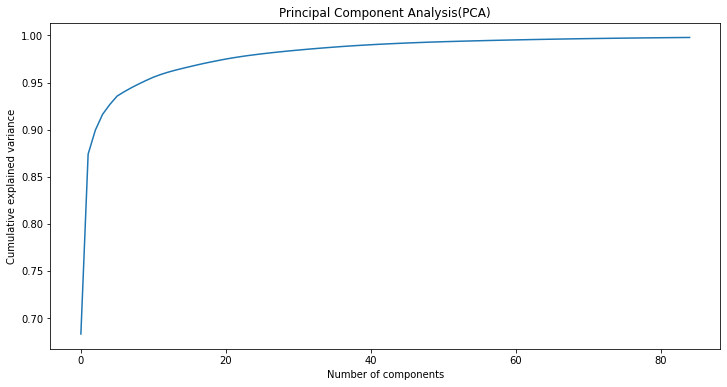

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 85)

principalComponents = pca.fit_transform(scale)

ev=pca.explained_variance_ratio_
print(ev)
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.title('Principal Component Analysis(PCA)')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()

In [13]:
pca = PCA(n_components = 85)
dt = pca.fit_transform(scale)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,86)]+['class']

In [14]:
q.isnull().values.any()

False

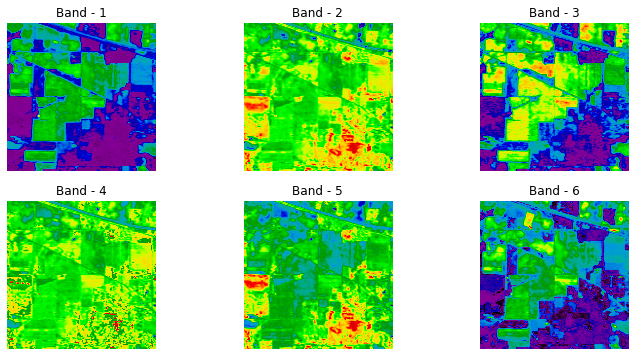

In [15]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    #plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(145, 145), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

plt.savefig('IP_PCA_Bands.png')

In [18]:
# saving to .csv
q.to_csv('IP_85_PCA.csv', index=False)

AttributeError: ignored

In [ ]:
x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values 

names = ['Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',		'Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11, stratify=y)
sc= StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



svm =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, ypred)*100}\n")
print(classification_report(y_test, ypred, target_names=names))

Accuracy: 91.1219512195122

                              precision    recall  f1-score   support

                     Alfalfa       1.00      0.86      0.92        14
                 Corn-notill       0.91      0.87      0.89       428
                Corn-mintill       0.89      0.84      0.87       249
                        Corn       0.78      0.87      0.82        71
               Grass-pasture       0.95      0.96      0.95       145
                 Grass-trees       0.97      0.97      0.97       219
         Grass-pasture-mowed       1.00      0.88      0.93         8
               Hay-windrowed       0.99      1.00      0.99       143
                        Oats       0.50      0.67      0.57         6
              Soybean-notill       0.89      0.86      0.88       292
             Soybean-mintill       0.88      0.93      0.91       737
               Soybean-clean       0.92      0.90      0.91       178
                       Wheat       0.97      1.00      0.98  

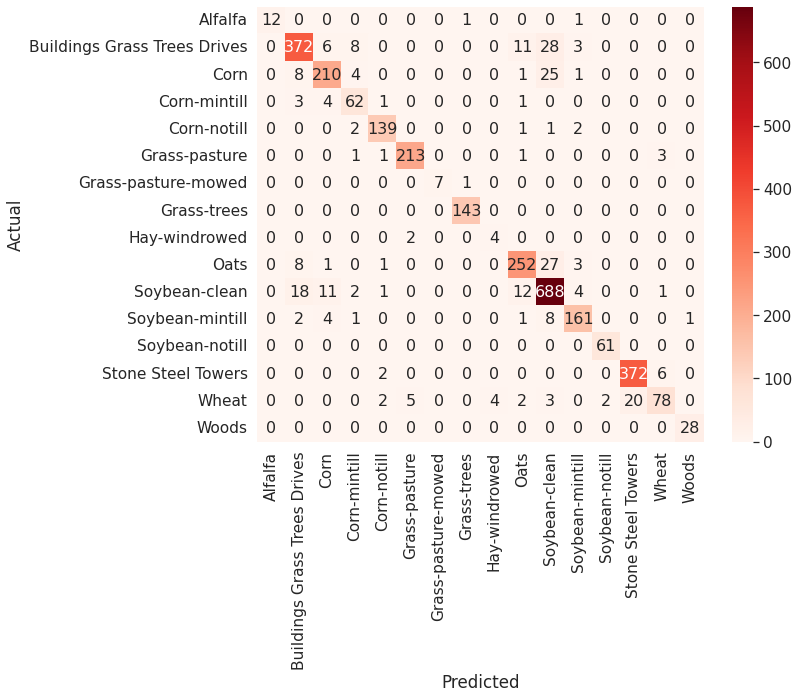

In [ ]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


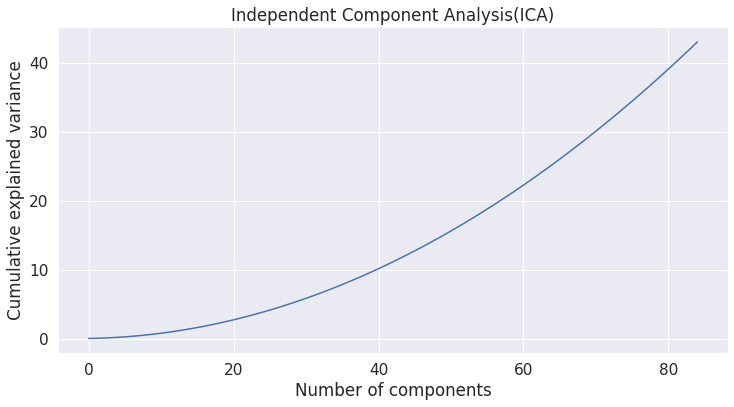

In [ ]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components = 85)

IndependentComponent = ica.fit_transform(df.iloc[:, :-1].values)

explained_variance = np.var(IndependentComponent, axis=0)
explained_variance_ratio = explained_variance/ np.sum(explained_variance)

idv=np.cumsum(explained_variance_ratio)

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(idv))
plt.title('Independent Component Analysis(ICA)')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()

In [ ]:
#ica = FastICA(n_components = 85)
#dt = ica.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = IndependentComponent), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,86)]+['class']

In [ ]:
# saving to .csv
q.to_csv('IP_85_ICA.csv', index=False)

In [ ]:
q.isnull().values.any()


True

In [ ]:
q.isnull().sum().sum()

10776

In [ ]:
q=q.fillna(0)

In [ ]:
#q=q.dropna()

In [ ]:
q.isnull().values.any()

False

In [ ]:
x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values 

names = ['Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',		'Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11, stratify=y)



svm =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)


svm =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, ypred)*100}\n")
print(classification_report(y_test, ypred, target_names=names))

Accuracy: 25.983739837398375

                              precision    recall  f1-score   support

                     Alfalfa       0.00      0.00      0.00        14
                 Corn-notill       0.21      0.31      0.25       428
                Corn-mintill       0.21      0.19      0.20       249
                        Corn       0.11      0.07      0.08        71
               Grass-pasture       0.20      0.14      0.17       145
                 Grass-trees       0.20      0.15      0.17       219
         Grass-pasture-mowed       0.00      0.00      0.00         8
               Hay-windrowed       0.19      0.13      0.15       143
                        Oats       0.00      0.00      0.00         6
              Soybean-notill       0.17      0.16      0.16       292
             Soybean-mintill       0.33      0.41      0.37       737
               Soybean-clean       0.24      0.17      0.20       178
                       Wheat       0.26      0.18      0.21

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


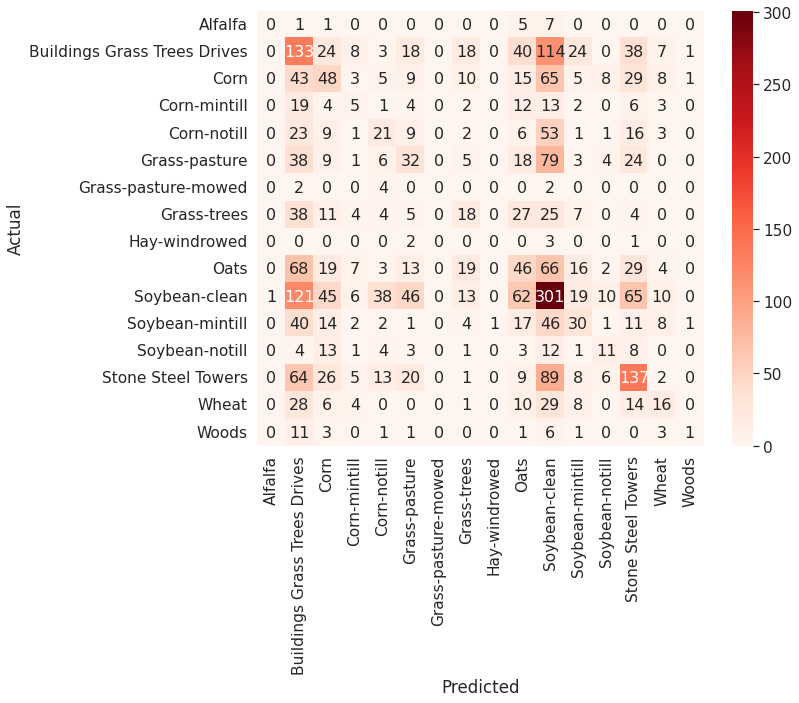

In [ ]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

In [ ]:
x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values 

names = ['Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',		'Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11, stratify=y)



svm =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)


svm =  SVC( kernel = 'linear')

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, ypred)*100}\n")
print(classification_report(y_test, ypred, target_names=names))

Accuracy: 23.96747967479675

                              precision    recall  f1-score   support

                     Alfalfa       0.00      0.00      0.00        14
                 Corn-notill       0.00      0.00      0.00       428
                Corn-mintill       0.00      0.00      0.00       249
                        Corn       0.00      0.00      0.00        71
               Grass-pasture       0.00      0.00      0.00       145
                 Grass-trees       0.00      0.00      0.00       219
         Grass-pasture-mowed       0.00      0.00      0.00         8
               Hay-windrowed       0.00      0.00      0.00       143
                        Oats       0.00      0.00      0.00         6
              Soybean-notill       0.00      0.00      0.00       292
             Soybean-mintill       0.24      1.00      0.39       737
               Soybean-clean       0.00      0.00      0.00       178
                       Wheat       0.00      0.00      0.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
